# Import Libs 

In [194]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

CURRENT_DATE = pd.to_datetime('01.04.2025', format='%d.%m.%Y')

# Read Data

In [176]:
data= pd.read_csv('data_retail.csv',sep=';')
data.head()

,TNX_ID,CUST_ID,CUST_BIRTH_DATE,GENDER,CITY,BALANCE_AMT,TNX_DATE_DDMMYYYY,TNX_TIME_HHMMSS,TNX_AMT
0,T1,K3635750,07.02.1953,M,DELHI,"398400,28",06.01.2025,141450,"26243,63"
1,T2,K6647259,05.07.1974,M,UDAIPUR,"11265,04",06.01.2025,131624,"137,63"
2,T3,K5488480,17.01.1987,F,PUNE,"441485,34",23.01.2025,200211,"9407,31"
3,T4,K2923826,06.09.1980,M,PUNE,"113206,71",08.01.2025,173743,"594,2"
4,T5,K7822327,07.10.1984,M,VADODARA,"21431,87",18.02.2025,213701,"493,74"


adjust date fields

In [177]:
print(f"initial birth date rate: % {data[data['CUST_BIRTH_DATE'].str.contains('/')==True].shape[0]*100/data.shape[0]} of the data")
data[data['CUST_BIRTH_DATE'].str.contains('/')==True].head()

initial birth date rate: % 5.468377463864591 of the data


,TNX_ID,CUST_ID,CUST_BIRTH_DATE,GENDER,CITY,BALANCE_AMT,TNX_DATE_DDMMYYYY,TNX_TIME_HHMMSS,TNX_AMT
7,T8,K4911924,1/1/1800,M,DELHI,"119395,7",17.01.2025,162512,"1955,82"
21,T22,K1417956,1/1/1800,M,MUMBAI,"59847,68",09.02.2025,61752,"998,28"
61,T62,K1941835,1/1/1800,M,BANGALORE,"324384,43",25.02.2025,103306,"595,88"
62,T63,K4016529,1/1/1800,M,NAVI MUMBAI,"126941,34",12.02.2025,15709,"281,16"
96,T97,K6516562,1/1/1800,F,MUMBAI,"11203,16",11.02.2025,202211,"463,3"


In [178]:
data['TNX_DATE_DDMMYYYY'] = pd.to_datetime(data['TNX_DATE_DDMMYYYY'], format = '%d.%m.%Y')
data['CUST_BIRTH_DATE'] = data['CUST_BIRTH_DATE'].replace("1/1/1800", np.nan)
data['CUST_BIRTH_DATE'] = pd.to_datetime(data['CUST_BIRTH_DATE'], format = '%d.%m.%Y')


# Ensure the time column is zero-padded to 6 digits
data['TNX_TIME_HHMMSS'] = data['TNX_TIME_HHMMSS'].astype(str).str.zfill(6)

# Convert to proper time format
data['TNX_TIME_HHMMSS'] = pd.to_datetime(data['TNX_TIME_HHMMSS'], format='%H%M%S').dt.time

data.head()

,TNX_ID,CUST_ID,CUST_BIRTH_DATE,GENDER,CITY,BALANCE_AMT,TNX_DATE_DDMMYYYY,TNX_TIME_HHMMSS,TNX_AMT
0,T1,K3635750,1953-02-07,M,DELHI,"398400,28",2025-01-06,14:14:50,"26243,63"
1,T2,K6647259,1974-07-05,M,UDAIPUR,"11265,04",2025-01-06,13:16:24,"137,63"
2,T3,K5488480,1987-01-17,F,PUNE,"441485,34",2025-01-23,20:02:11,"9407,31"
3,T4,K2923826,1980-09-06,M,PUNE,"113206,71",2025-01-08,17:37:43,"594,2"
4,T5,K7822327,1984-10-07,M,VADODARA,"21431,87",2025-02-18,21:37:01,"493,74"


handle duplicates

In [179]:
data[data.duplicated(['CUST_ID','TNX_DATE_DDMMYYYY'])].head()

,TNX_ID,CUST_ID,CUST_BIRTH_DATE,GENDER,CITY,BALANCE_AMT,TNX_DATE_DDMMYYYY,TNX_TIME_HHMMSS,TNX_AMT
10665,T10666,K3427762,1982-07-23,F,CHENNAI,"161612,24",2025-02-01,19:48:28,"619,55"
13590,T13591,K8513441,1991-03-20,M,BANGALORE,"4238,72",2025-03-01,22:41:34,"2380,37"
17531,T17532,K1437659,1992-01-17,M,TRIVANDRUM,"8258,98",2025-02-07,15:05:21,"310,6"
42534,T42535,K2511057,NaT,M,DELHI,"29364,12",2025-01-24,11:41:02,"1865,75"
43909,T43910,K2936183,1970-10-10,M,THANE,"132607,12",2025-01-17,15:49:28,"4826,69"


In [180]:
data[(data['CUST_ID']=='K3427762')]

,TNX_ID,CUST_ID,CUST_BIRTH_DATE,GENDER,CITY,BALANCE_AMT,TNX_DATE_DDMMYYYY,TNX_TIME_HHMMSS,TNX_AMT
5413,T5414,K3427762,1991-12-02,M,MADURAI,"20620,6",2025-02-01,13:12:10,"91,98"
10665,T10666,K3427762,1982-07-23,F,CHENNAI,"161612,24",2025-02-01,19:48:28,"619,55"
712326,T712327,K3427762,1984-07-29,M,MUMBAI,"686,78",2025-01-20,20:19:23,"2126,78"


In [181]:
data['CUST_ID'] = data['CITY'] + '_' + data['CUST_ID']
data[(data['CUST_ID']=='CHENNAI_K3427762')]

,TNX_ID,CUST_ID,CUST_BIRTH_DATE,GENDER,CITY,BALANCE_AMT,TNX_DATE_DDMMYYYY,TNX_TIME_HHMMSS,TNX_AMT
10665,T10666,CHENNAI_K3427762,1982-07-23,F,CHENNAI,"161612,24",2025-02-01,19:48:28,"619,55"


Missing Values %

<Axes: >

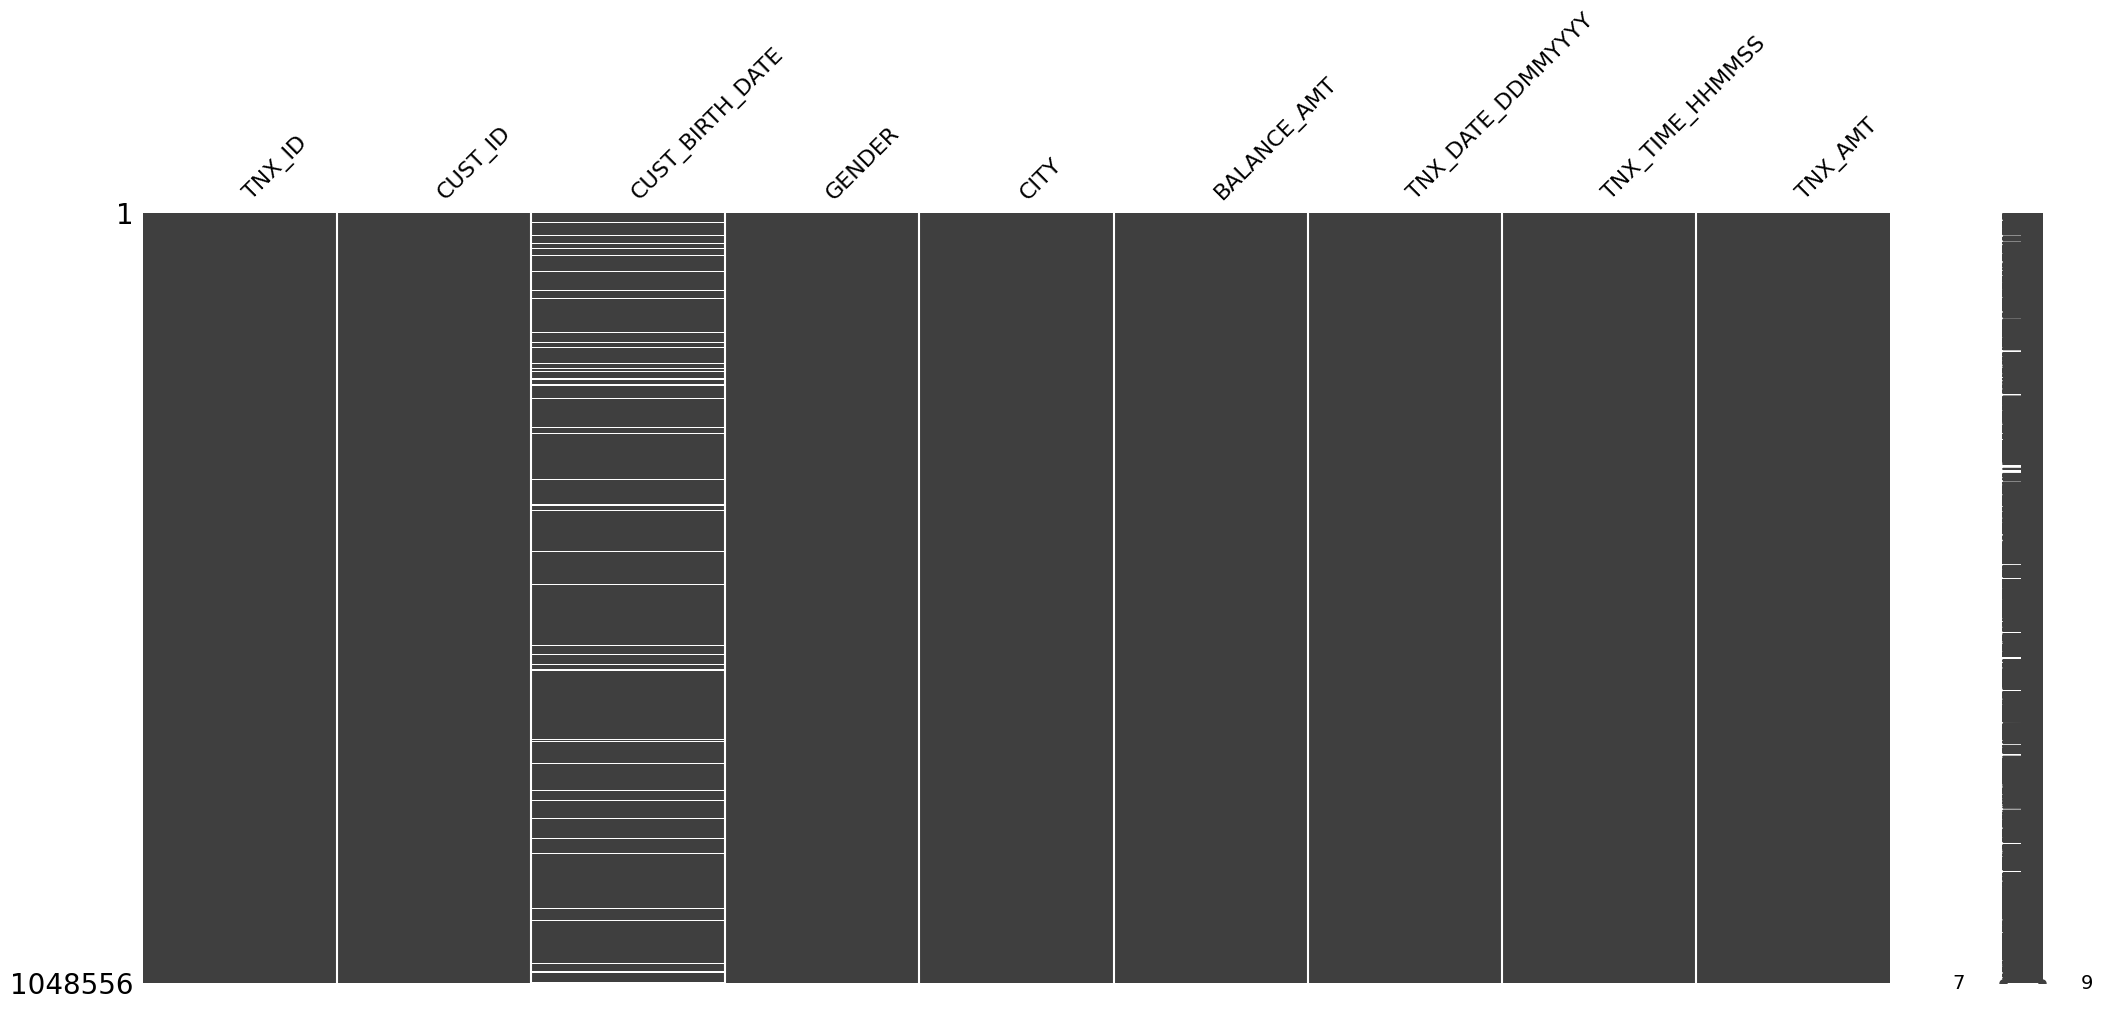

In [182]:
# Visualize missing values
msno.matrix(data)

In [183]:
data.isna().sum()*100/data.shape[0]

TNX_ID               0.000000
CUST_ID              0.014401
CUST_BIRTH_DATE      5.792347
GENDER               0.104906
CITY                 0.014401
BALANCE_AMT          0.000000
TNX_DATE_DDMMYYYY    0.000000
TNX_TIME_HHMMSS      0.000000
TNX_AMT              0.000000
dtype: float64

In [184]:
data = data.dropna()


you can adjust here. i directly exclude missing value records. you can fill them
- ie. ages might be filled w avg age of city and gender

In [185]:
# clean data which has larger birthday than current
data[data['CUST_BIRTH_DATE']>CURRENT_DATE].head()

,TNX_ID,CUST_ID,CUST_BIRTH_DATE,GENDER,CITY,BALANCE_AMT,TNX_DATE_DDMMYYYY,TNX_TIME_HHMMSS,TNX_AMT
2575,T2576,NEW DELHI_K3229030,2029-09-23,M,NEW DELHI,"34950,97",2025-01-08,12:34:10,"763,88"
14684,T14685,NEW DELHI_K2240340,2029-08-04,M,NEW DELHI,"20360,54",2025-01-11,18:02:24,"7415,59"
19893,T19894,THANE WEST_K7042826,2027-05-25,M,THANE WEST,"839141,61",2025-01-21,18:17:49,"212,65"
26525,T26526,NEW DELHI_K1724019,2029-04-01,M,NEW DELHI,"98934,77",2025-01-02,17:49:17,"339,47"
37428,T37429,NEW DELHI_K3440334,2029-08-04,M,NEW DELHI,"21330,58",2025-03-01,12:37:10,"25,84"


In [186]:
data = data[data['CUST_BIRTH_DATE'] < CURRENT_DATE]
data.head()

,TNX_ID,CUST_ID,CUST_BIRTH_DATE,GENDER,CITY,BALANCE_AMT,TNX_DATE_DDMMYYYY,TNX_TIME_HHMMSS,TNX_AMT
0,T1,DELHI_K3635750,1953-02-07,M,DELHI,"398400,28",2025-01-06,14:14:50,"26243,63"
1,T2,UDAIPUR_K6647259,1974-07-05,M,UDAIPUR,"11265,04",2025-01-06,13:16:24,"137,63"
2,T3,PUNE_K5488480,1987-01-17,F,PUNE,"441485,34",2025-01-23,20:02:11,"9407,31"
3,T4,PUNE_K2923826,1980-09-06,M,PUNE,"113206,71",2025-01-08,17:37:43,"594,2"
4,T5,VADODARA_K7822327,1984-10-07,M,VADODARA,"21431,87",2025-02-18,21:37:01,"493,74"


TNX_AMT and  BALANCE_AMT cols converted to float

In [187]:
data = data[data['TNX_AMT'] !=  '#ARG!']
data = data[data['BALANCE_AMT'] !=  '#ARG!']
data['TNX_AMT'] = data['TNX_AMT'].apply(lambda x:x.replace(',','.'))
data['TNX_AMT'] = data['TNX_AMT'].astype('float')
data['BALANCE_AMT'] = data['BALANCE_AMT'].apply(lambda x:x.replace(',','.'))
data['BALANCE_AMT'] = data['BALANCE_AMT'].astype('float')

Feature Engineering

In [188]:
# Calculate age
data['AGE'] = (CURRENT_DATE - data['CUST_BIRTH_DATE']).dt.days // 365
data = data[data['AGE'] >= 18]
data = data.drop('CUST_BIRTH_DATE',axis=1)
data.head()

,TNX_ID,CUST_ID,GENDER,CITY,BALANCE_AMT,TNX_DATE_DDMMYYYY,TNX_TIME_HHMMSS,TNX_AMT,AGE
0,T1,DELHI_K3635750,M,DELHI,398400.28,2025-01-06,14:14:50,26243.63,72
1,T2,UDAIPUR_K6647259,M,UDAIPUR,11265.04,2025-01-06,13:16:24,137.63,50
2,T3,PUNE_K5488480,F,PUNE,441485.34,2025-01-23,20:02:11,9407.31,38
3,T4,PUNE_K2923826,M,PUNE,113206.71,2025-01-08,17:37:43,594.20,44
4,T5,VADODARA_K7822327,M,VADODARA,21431.87,2025-02-18,21:37:01,493.74,40


Gender col label encoding

- M : 1
- F : 2

In [189]:
data['GENDER'] = data['GENDER'].map({'M': 1, 'F': 2})
data.head()

,TNX_ID,CUST_ID,GENDER,CITY,BALANCE_AMT,TNX_DATE_DDMMYYYY,TNX_TIME_HHMMSS,TNX_AMT,AGE
0,T1,DELHI_K3635750,1,DELHI,398400.28,2025-01-06,14:14:50,26243.63,72
1,T2,UDAIPUR_K6647259,1,UDAIPUR,11265.04,2025-01-06,13:16:24,137.63,50
2,T3,PUNE_K5488480,2,PUNE,441485.34,2025-01-23,20:02:11,9407.31,38
3,T4,PUNE_K2923826,1,PUNE,113206.71,2025-01-08,17:37:43,594.20,44
4,T5,VADODARA_K7822327,1,VADODARA,21431.87,2025-02-18,21:37:01,493.74,40


In [190]:
data.describe()

,GENDER,BALANCE_AMT,TNX_DATE_DDMMYYYY,TNX_AMT,AGE
count,965872.000000,9.658720e+05,965872,9.658720e+05,965872.000000
mean,1.278722,1.073665e+05,2025-01-27 07:01:55.871253760,1.473648e+03,39.356603
min,1.000000,0.000000e+00,2025-01-01 00:00:00,0.000000e+00,18.000000
25%,1.000000,4.972735e+03,2025-01-13 00:00:00,1.619500e+02,33.000000
50%,1.000000,1.656565e+04,2025-01-25 00:00:00,4.453650e+02,37.000000
75%,2.000000,5.486105e+04,2025-02-11 00:00:00,1.149230e+03,43.000000
max,2.000000,1.177910e+08,2025-03-30 00:00:00,1.619626e+06,95.000000
std,0.448371,8.221239e+05,NaN,6.212103e+03,8.744127


In [192]:
data.describe(include=[object]) 

,TNX_ID,CUST_ID,CITY,TNX_TIME_HHMMSS
count,965872,965872,965872,965872
unique,965872,958952,8030,81102
top,T1048538,NEW DELHI_K3710948,MUMBAI,19:33:03
freq,1,4,96187,46


RFM yap clustering icin

# EDA

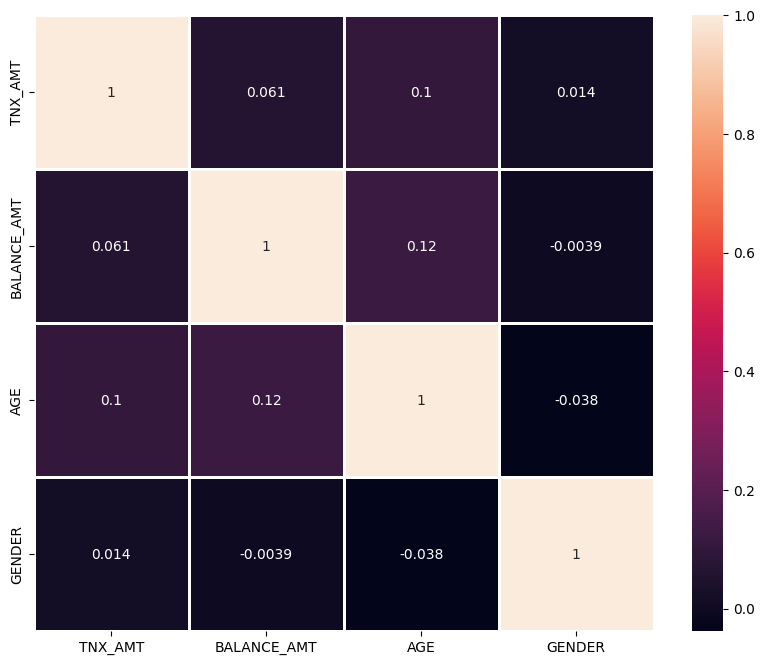

In [196]:
plt.figure(figsize = (10, 8))

sns.heatmap(data = data[['TNX_AMT','BALANCE_AMT','AGE','GENDER']].corr(), annot = True, fmt = '.2g', linewidth = 1)
plt.show()